sep-24                  0
sep-23                  0
Programming Language    0
Ratings                 0
Change                  0
dtype: int64

Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -0.64
- El intercepto del modelo es: 10.73

Interpretación del comportamiento:
- El modelo muestra una relación entre el ranking de popularidad y la calificación de los lenguajes de programación.
- El coeficiente de la pendiente (-0.64) sugiere que a medida que aumenta el ranking (menos popularidad), la calificación disminuye.
- El intercepto (10.73) indica el valor estimado de la calificación cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.

Análisis más detallado:
- El lenguaje de programación con mayor calificación es Python (20.17%), mientras que el de menor calificación es Swift (1.08%).
- La regresión muestra una disminución progresiva en la calificación a medida que disminuye el ranking, 

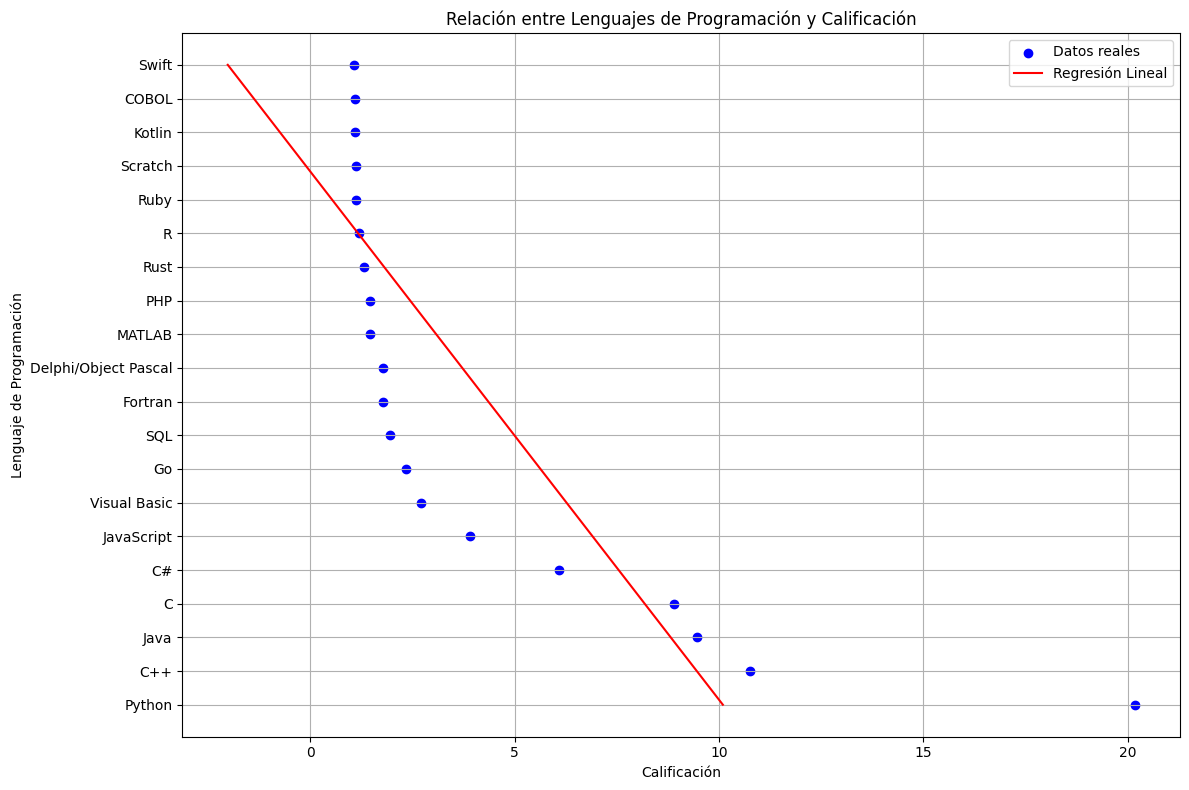

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV con el separador ';'
archivo_csv = "LenguajesSeo2024.csv"  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa
df = pd.read_csv(archivo_csv, sep=";")

# Verificar si hay valores NaN en las columnas
print(df.isnull().sum())

# Ordenar por Ratings y resetear el índice
df = df.sort_values(by="Ratings", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values
y = df["Ratings"].values

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print(f"- El modelo muestra una relación entre el ranking de popularidad y la calificación de los lenguajes de programación.")
print(f"- El coeficiente de la pendiente ({pendiente:.2f}) sugiere que a medida que aumenta el ranking (menos popularidad), la calificación disminuye.")
print(f"- El intercepto ({intercepto:.2f}) indica el valor estimado de la calificación cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.")
print("\nAnálisis más detallado:")
top_lenguaje = df.iloc[0]["Programming Language"]
top_rating = df.iloc[0]["Ratings"]
bottom_lenguaje = df.iloc[-1]["Programming Language"]
bottom_rating = df.iloc[-1]["Ratings"]

print(f"- El lenguaje de programación con mayor calificación es {top_lenguaje} ({top_rating}%), mientras que el de menor calificación es {bottom_lenguaje} ({bottom_rating}%).")
print(f"- La regresión muestra una disminución progresiva en la calificación a medida que disminuye el ranking, lo que es común en listas de popularidad de lenguajes de programación.")
print(f"- El análisis sugiere que existe una correlación negativa entre el ranking y la calificación.")

# Configurar el gráfico con los nombres de los lenguajes en el eje y
plt.figure(figsize=(12, 8))
plt.scatter(df["Ratings"], df["Programming Language"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Programming Language"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Calificación")
plt.ylabel("Lenguaje de Programación")
plt.title("Relación entre Lenguajes de Programación y Calificación")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()